** Jarvin Chavez

#Dataset 
#https://github.com/computingcelts/f25-ds-examples/blob/main/datasets/cars.csv

# Part 1. Scikit-Learn Multiple Linear Regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

df = pd.read_csv("cars.csv")  
df.head()

,brand,type,c_mpg,h_mph,air_b,drive_train,n_cil,eng_size,hp,rpm,...,passen,length,wheelbase,widh,u_turn_space,rear_seat_room,lugg_cap,weight,dom,class
0,Acura,Small,25,31,0,1,4,1.8,140,6300,...,5,177,102,68,37,26.5,11,2705,0,15.9
1,Acura,Midsize,18,25,2,1,6,3.2,200,5500,...,5,195,115,71,38,30,15,3560,0,33.9
2,Audi,Compact,20,26,1,1,6,2.8,172,5500,...,5,180,102,67,37,28,14,3375,0,29.1
3,Audi,Midsize,19,26,2,1,6,2.8,172,5500,...,6,193,106,70,37,31,17,3405,0,37.7
4,BMW,Midsize,22,30,1,0,4,3.5,208,5700,...,4,186,109,69,39,27,13,3640,0,30.0


In [8]:
y = df["class"]

X = df.drop(columns=["class"])

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_encoded.head()

Categorical columns: ['brand', 'type', 'n_cil', 'rear_seat_room', 'lugg_cap']
Numeric columns: ['c_mpg', 'h_mph', 'air_b', 'drive_train', 'eng_size', 'hp', 'rpm', 'rpmxmile', 'trans', 'tank_cap', 'passen', 'length', 'wheelbase', 'widh', 'u_turn_space', 'weight', 'dom']


,c_mpg,h_mph,air_b,drive_train,eng_size,hp,rpm,rpmxmile,trans,tank_cap,...,lugg_cap_17,lugg_cap_18,lugg_cap_19,lugg_cap_20,lugg_cap_21,lugg_cap_22,lugg_cap_6,lugg_cap_8,lugg_cap_9,lugg_cap_?
0,25,31,0,1,1.8,140,6300,2890,1,13.2,...,False,False,False,False,False,False,False,False,False,False
1,18,25,2,1,3.2,200,5500,2335,1,18.0,...,False,False,False,False,False,False,False,False,False,False
2,20,26,1,1,2.8,172,5500,2280,1,16.9,...,False,False,False,False,False,False,False,False,False,False
3,19,26,2,1,2.8,172,5500,2535,1,21.1,...,True,False,False,False,False,False,False,False,False,False
4,22,30,1,0,3.5,208,5700,2545,1,21.1,...,False,False,False,False,False,False,False,False,False,False


,brand,type,c_mpg,h_mph,air_b,drive_train,n_cil,eng_size,hp,rpm,...,passen,length,wheelbase,widh,u_turn_space,rear_seat_room,lugg_cap,weight,dom,class
count,93,93,93.000000,93.000000,93.000000,93.000000,93,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93,93,93.000000,93.000000,93.000000
unique,31,6,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25,17,NaN,NaN,NaN
top,Chevrolet,Midsize,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.5,14,NaN,NaN,NaN
freq,8,22,NaN,NaN,NaN,NaN,49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,18,NaN,NaN,NaN
mean,NaN,NaN,22.365591,29.086022,0.806452,0.935484,NaN,2.667742,143.827957,5280.645161,...,5.086022,183.204301,103.946237,69.376344,38.956989,NaN,NaN,3072.903226,0.516129,19.509677
std,NaN,NaN,5.619812,5.331726,0.711063,0.527637,NaN,1.037363,52.374410,596.731690,...,1.038979,14.602382,6.819674,3.778986,3.223265,NaN,NaN,589.896510,0.502448,9.659430
min,NaN,NaN,15.000000,20.000000,0.000000,0.000000,NaN,1.000000,55.000000,3800.000000,...,2.000000,141.000000,90.000000,60.000000,32.000000,NaN,NaN,1695.000000,0.000000,7.400000
25%,NaN,NaN,18.000000,26.000000,0.000000,1.000000,NaN,1.800000,103.000000,4800.000000,...,4.000000,174.000000,98.000000,67.000000,37.000000,NaN,NaN,2620.000000,0.000000,12.200000
50%,NaN,NaN,21.000000,28.000000,1.000000,1.000000,NaN,2.400000,140.000000,5200.000000,...,5.000000,183.000000,103.000000,69.000000,39.000000,NaN,NaN,3040.000000,1.000000,17.700000
75%,NaN,NaN,25.000000,31.000000,1.000000,1.000000,NaN,3.300000,170.000000,5750.000000,...,6.000000,192.000000,110.000000,72.000000,41.000000,NaN,NaN,3525.000000,1.000000,23.300000


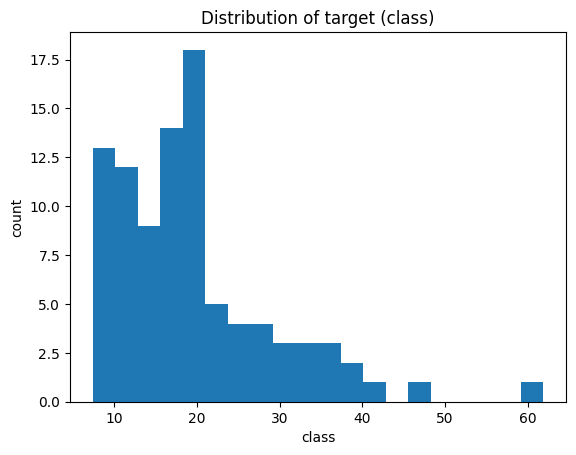

In [9]:
display(df.describe(include="all"))

plt.hist(y, bins=20)
plt.title("Distribution of target (class)")
plt.xlabel("class")
plt.ylabel("count")
plt.show()

In [10]:
linreg = LinearRegression()
linreg.fit(X_encoded, y)

r2_full = linreg.score(X_encoded, y)
print("R^2 on full data (no CV):", r2_full)

R^2 on full data (no CV): 1.0


In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

r2_scores = cross_val_score(linreg, X_encoded, y, cv=kf, scoring="r2")

def rmse_func(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)   
    return np.sqrt(mse)                    

rmse_scorer = make_scorer(rmse_func, greater_is_better=False)
rmse_scores = cross_val_score(linreg, X_encoded, y, cv=kf, scoring=rmse_scorer)

print("10-fold CV R^2 scores:", r2_scores)
print("Mean R^2:", r2_scores.mean())
print("Std R^2:", r2_scores.std())

rmse_scores_pos = -rmse_scores

print("\n10-fold CV RMSE scores:", rmse_scores_pos)
print("Mean RMSE:", rmse_scores_pos.mean())
print("Std RMSE:", rmse_scores_pos.std())

10-fold CV R^2 scores: [-0.02581909 -0.88288774 -1.09873951 -1.48139594 -1.6849175  -0.81915956
 -3.85657802 -0.29291337 -4.118618   -0.88612897]
Mean R^2: -1.5147157701822014
Std R^2: 1.321191946490572

10-fold CV RMSE scores: [ 8.78630435 12.87441679  8.49088099 17.67356945 13.27271869 10.17732797
 17.14927336 16.88980558 21.00399957  9.91850602]
Mean RMSE: 13.623680276181688
Std RMSE: 4.123156085363544


In [12]:
linreg.fit(X_encoded, y)

coef_df = pd.DataFrame({
    "feature": X_encoded.columns,
    "coefficient": linreg.coef_
}).sort_values("coefficient", ascending=False)

display(coef_df)

,feature,coefficient
94,lugg_cap_8,81.049928
18,brand_BMW,76.679557
91,lugg_cap_21,66.316226
95,lugg_cap_9,65.948425
20,brand_Cadillac,65.675675
...,...,...
55,n_cil_8,-105.915690
59,rear_seat_room_23.5,-110.881236
53,n_cil_5,-122.608358
56,n_cil_?,-157.862513
